In [56]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [57]:
DATASET_PATH = 'https://raw.githubusercontent.com/mdiannna/Labs_UTM_AI/main/Lab3/apartmentComplexData.txt'
COLUMN_NAMES_FULL = ['col1', 'col2', 'complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants', 'apartmentsNr', 'col8', 'medianCompexValue']
# The model should predict the column 'medianCompexValue'

In [58]:
df = pd.read_csv(DATASET_PATH, names=COLUMN_NAMES_FULL)
df.head()

,col1,col2,complexAge,totalRooms,totalBedrooms,complexInhabitants,apartmentsNr,col8,medianCompexValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [59]:
df.describe()

,col1,col2,complexAge,totalRooms,totalBedrooms,complexInhabitants,apartmentsNr,col8,medianCompexValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41ef296710>,
      dtype=object)

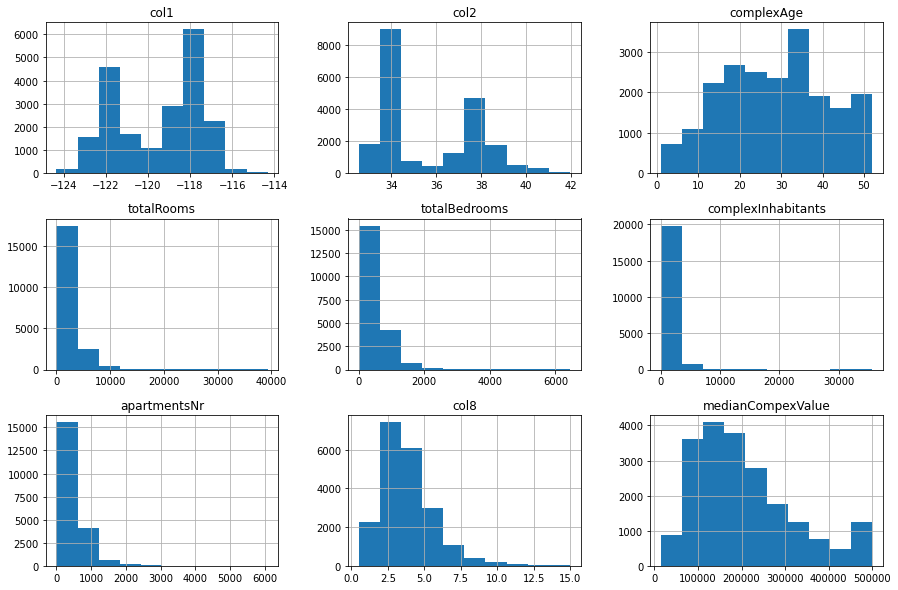

In [60]:
## Show data distributions
df.hist(bins=10, figsize=(15,10))

In [61]:
## medianComplexValue column is not balanced

## Some other plots

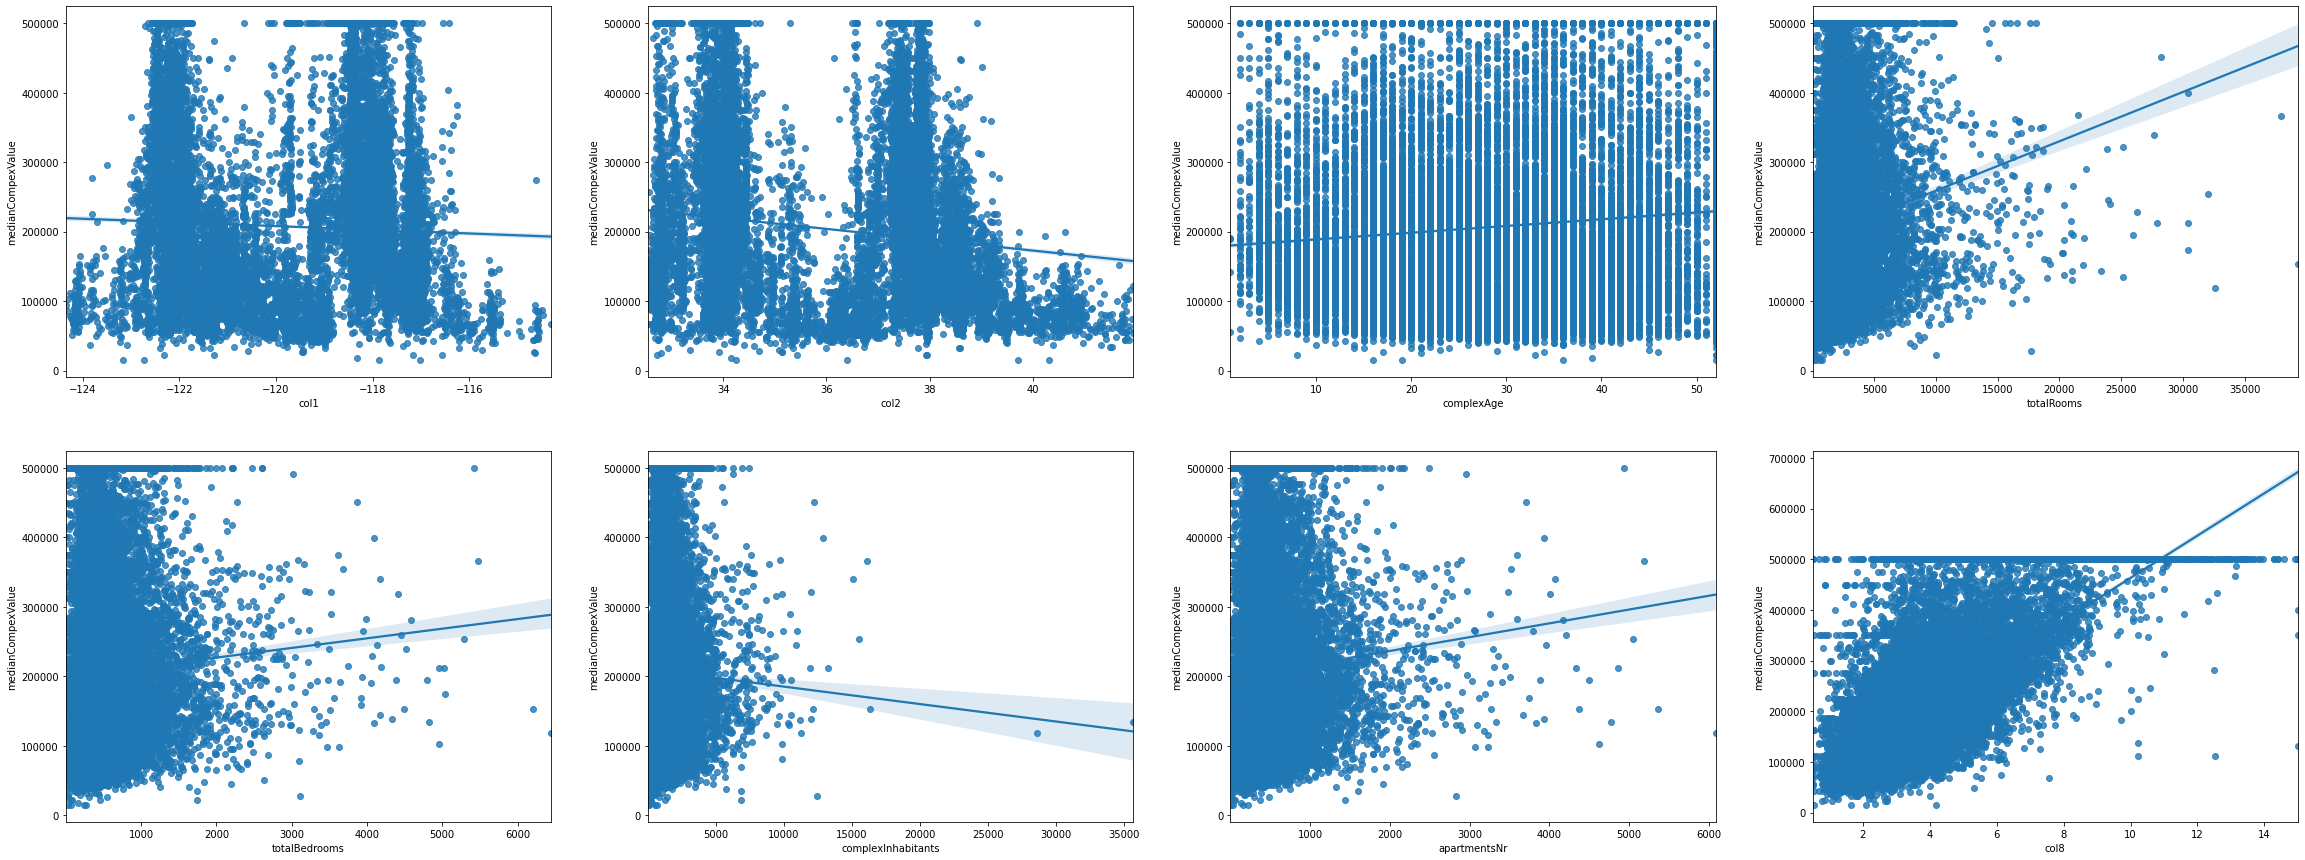

In [62]:
# this might take some time to execute

fig, axs = plt.subplots(ncols=4, nrows=2)
# set figure size
fig.set_figheight(15)
fig.set_figwidth(40)

i = 0
j = 0

for col in COLUMN_NAMES_FULL:
  if col!='medianCompexValue':
    sns.regplot(data=df, x=col, y='medianCompexValue', ax=axs[i % 2][j % 4])
    j+=1
    if j==4:
      i+=1
  



## Correlations

### Compute and show the correlation matrix

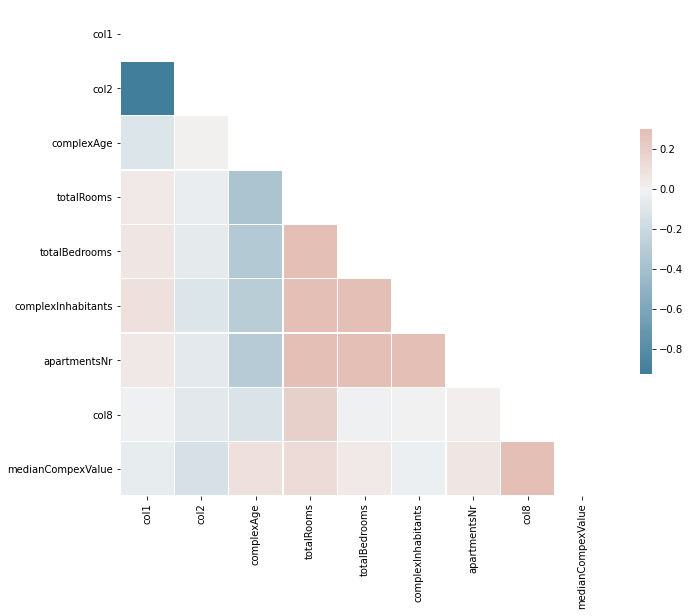

In [63]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [64]:
corr.style.background_gradient(cmap='coolwarm')


,col1,col2,complexAge,totalRooms,totalBedrooms,complexInhabitants,apartmentsNr,col8,medianCompexValue
col1,1.000000,-0.924664,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.015176,-0.045967
col2,-0.924664,1.000000,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,-0.079809,-0.144160
complexAge,-0.108197,0.011173,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,-0.119034,0.105623
totalRooms,0.044568,-0.036100,-0.361262,1.000000,0.929893,0.857126,0.918484,0.198050,0.134153
totalBedrooms,0.068378,-0.066318,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.008093,0.050594
complexInhabitants,0.099773,-0.108785,-0.296244,0.857126,0.878026,1.000000,0.907222,0.004834,-0.024650
apartmentsNr,0.055310,-0.071035,-0.302916,0.918484,0.979829,0.907222,1.000000,0.013033,0.065843
col8,-0.015176,-0.079809,-0.119034,0.198050,-0.008093,0.004834,0.013033,1.000000,0.688075
medianCompexValue,-0.045967,-0.144160,0.105623,0.134153,0.050594,-0.024650,0.065843,0.688075,1.000000


## Simple linear regression with 1 parameter - col8 - that has the biggest correlation (0.688)


In [65]:
from sklearn.linear_model import LinearRegression

X = df[['col8']]
y = df['medianCompexValue'].values.flatten()


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [67]:

reg = LinearRegression().fit(X_train, y_train)

#### Evaluate the model and show results

In [68]:
# from sklearn.metrics import f1_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Score on train set
print("Score on train (r-squared score):", reg.score(X_train, y_train))
print("Explained variance score:", explained_variance_score(y_train, reg.predict(X_train)))
print("MSE:", mean_squared_error(y_train, reg.predict(X_train)))
cv_score_train = cross_val_score(reg, X_train, y_train, cv=5)
print("cross val score:", cv_score_train)
print("average of cross val scores:", np.average(cv_score_train))


Score on train (r-squared score): 0.47385099422099225
Explained variance score: 0.4738509942209922
MSE: 7003180237.26786
cross val score: [0.46612951 0.47029091 0.47862513 0.48259689 0.47108715]
average of cross val scores: 0.47374591860634807


In [69]:
# from sklearn.metrics import f1_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Score on train set
print("Score on test (r-squared score):", reg.score(X_test, y_test))
print("Explained variance score:", explained_variance_score(y_test, reg.predict(X_test)))
print("MSE:", mean_squared_error(y_test, reg.predict(X_test)))
cv_score_test = cross_val_score(reg, X_test, y_test, cv=5)
print("cross val score:", cv_score_test)
print("average of cross val scores:", np.average(cv_score_test))

Score on test (r-squared score): 0.47257206833670745
Explained variance score: 0.4727089191512577
MSE: 7028461448.540977
cross val score: [0.47611512 0.44405205 0.44355841 0.51535857 0.47719723]
average of cross val scores: 0.4712562764033164


In [70]:
df_scores = pd.DataFrame({
    'Scores': ['Scores on train', 'Scores on test'],
    'R-squared': [reg.score(X_train, y_train), reg.score(X_test, y_test)],
    'Explained variance score': [ explained_variance_score(y_train, reg.predict(X_train)),  explained_variance_score(y_test, reg.predict(X_test))],
    'MSE': [mean_squared_error(y_train, reg.predict(X_train)), mean_squared_error(y_test, reg.predict(X_test))],
    'Cross vall score average': [np.average(cv_score_train), np.average(cv_score_test)]
                          })
df_scores

,Scores,R-squared,Explained variance score,MSE,Cross vall score average
0,Scores on train,0.473851,0.473851,7.003180e+09,0.473746
1,Scores on test,0.472572,0.472709,7.028461e+09,0.471256


#### Make a new prediction


In [71]:
# Make a new prediction on the data from the first row of X_test
print("Predict price on first row of the X_test:")
print([X_test.iloc[0]])
print()
print("Real price:", y_test[0])
prediction = reg.predict([X_test.iloc[0]])[0]
print("Predicted price:", prediction)
print("Difference:", abs(prediction-y_test[0]))
print("Difference in %: ", abs(prediction-y_test[0]) / y_test[0], "%")



Predict price on first row of the X_test:
[col8    1.6812
Name: 20046, dtype: float64]

Real price: 47700.0
Predicted price: 115039.43337817646
Difference: 67339.43337817646
Difference in %:  1.411728163064496 %


## Multiple linear regression in sklearn - only specified columns with names

In [72]:
from sklearn.linear_model import LinearRegression

X = df[['complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants', 'apartmentsNr']]

y = df['medianCompexValue'].values.flatten()


In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [74]:
reg = LinearRegression().fit(X_train, y_train)

#### Evaluate the model and show results

In [75]:
# from sklearn.metrics import f1_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Score on train set
print("Score on train (r-squared score):", reg.score(X_train, y_train))
print("Explained variance score:", explained_variance_score(y_train, reg.predict(X_train)))
print("MSE:", mean_squared_error(y_train, reg.predict(X_train)))
cv_score_train = cross_val_score(reg, X_train, y_train, cv=5)
print("cross val score:", cv_score_train)
print("average of cross val scores:", np.average(cv_score_train))


Score on train (r-squared score): 0.1582842334246557
Explained variance score: 0.1582842334246558
MSE: 11203455973.749563
cross val score: [0.16792011 0.16708477 0.16054705 0.17199183 0.10277464]
average of cross val scores: 0.15406367781584623


In [76]:
# from sklearn.metrics import f1_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Score on train set
print("Score on test (r-squared score):", reg.score(X_test, y_test))
print("Explained variance score:", explained_variance_score(y_test, reg.predict(X_test)))
print("MSE:", mean_squared_error(y_test, reg.predict(X_test)))
cv_score_test = cross_val_score(reg, X_test, y_test, cv=5)
print("cross val score:", cv_score_test)
print("average of cross val scores:", np.average(cv_score_test))

Score on test (r-squared score): 0.1589948299934283
Explained variance score: 0.15901555585580263
MSE: 11207166061.103449
cross val score: [0.1536886  0.14648321 0.1431919  0.1822805  0.16443502]
average of cross val scores: 0.15801584500243954


In [77]:
df_scores = pd.DataFrame({
    'Scores': ['Scores on train', 'Scores on test'],
    'R-squared': [reg.score(X_train, y_train), reg.score(X_test, y_test)],
    'Explained variance score': [ explained_variance_score(y_train, reg.predict(X_train)),  explained_variance_score(y_test, reg.predict(X_test))],
    'MSE': [mean_squared_error(y_train, reg.predict(X_train)), mean_squared_error(y_test, reg.predict(X_test))],
    'Cross vall score average': [ np.average(cv_score_train),  np.average(cv_score_test)]
                          })
df_scores

,Scores,R-squared,Explained variance score,MSE,Cross vall score average
0,Scores on train,0.158284,0.158284,1.120346e+10,0.154064
1,Scores on test,0.158995,0.159016,1.120717e+10,0.158016


## Multiple linear regression in sklearn - all the columns

In [78]:
from sklearn.linear_model import LinearRegression

X = df[['col1', 'col2', 'complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants', 'apartmentsNr', 'col8']]

y = df['medianCompexValue'].values.flatten()


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [80]:
reg = LinearRegression().fit(X_train, y_train)

#### Evaluate and show results

In [81]:
# from sklearn.metrics import f1_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Score on train set
print("Score on train (r-squared score):", reg.score(X_train, y_train))
print("Explained variance score:", explained_variance_score(y_train, reg.predict(X_train)))
print("MSE:", mean_squared_error(y_train, reg.predict(X_train)))
cv_score_train = cross_val_score(reg, X_train, y_train, cv=5)
print("cross val score:", cv_score_train)
print("average of cross val scores:", np.average(cv_score_train))


Score on train (r-squared score): 0.6366026367397185
Explained variance score: 0.6366026367397185
MSE: 4836913506.833791
cross val score: [0.62100906 0.64291955 0.66183546 0.63697333 0.60746995]
average of cross val scores: 0.6340414700668516


In [82]:
# from sklearn.metrics import f1_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Score on train set
print("Score on test (r-squared score):", reg.score(X_test, y_test))
print("Explained variance score:", explained_variance_score(y_test, reg.predict(X_test)))
print("MSE:", mean_squared_error(y_test, reg.predict(X_test)))
cv_score_test = cross_val_score(reg, X_test, y_test, cv=5)
print("cross val score:", cv_score_test)
print("average of cross val scores:", np.average(cv_score_test))

Score on test (r-squared score): 0.6378669755308478
Explained variance score: 0.6379102070945835
MSE: 4825755044.292668
cross val score: [0.63601146 0.59886899 0.62597059 0.67517998 0.64457183]
average of cross val scores: 0.6361205685977771


In [83]:
df_scores = pd.DataFrame({
    'Scores': ['Scores on train', 'Scores on test'],
    'R-squared': [reg.score(X_train, y_train), reg.score(X_test, y_test)],
    'Explained variance score': [ explained_variance_score(y_train, reg.predict(X_train)),  explained_variance_score(y_test, reg.predict(X_test))],
    'MSE': [mean_squared_error(y_train, reg.predict(X_train)), mean_squared_error(y_test, reg.predict(X_test))],
    'Cross vall score average': [ np.average(cv_score_train),  np.average(cv_score_test)]
                          })
df_scores

,Scores,R-squared,Explained variance score,MSE,Cross vall score average
0,Scores on train,0.636603,0.636603,4.836914e+09,0.634041
1,Scores on test,0.637867,0.637910,4.825755e+09,0.636121


#### Make a new prediction

In [84]:
# Make a new prediction on the data from the first row of X_test
print("Predict price on first row of the X_test:")
print([X_test.iloc[0]])
print()
print("Real price:", y_test[0])
prediction = reg.predict([X_test.iloc[0]])[0]
print("Predicted price:", prediction)
print("Difference:", abs(prediction-y_test[0]))
print("Difference in %: ", abs(prediction-y_test[0]) / y_test[0], "%")



Predict price on first row of the X_test:
[col1                  -119.0100
col2                    36.0600
complexAge              25.0000
totalRooms            1505.0000
totalBedrooms          367.0000
complexInhabitants    1392.0000
apartmentsNr           359.0000
col8                     1.6812
Name: 20046, dtype: float64]

Real price: 47700.0
Predicted price: 56608.13476678962
Difference: 8908.134766789619
Difference in %:  0.1867533494085874 %


## Plot some results

In [85]:
Y_pred = reg.predict(X)

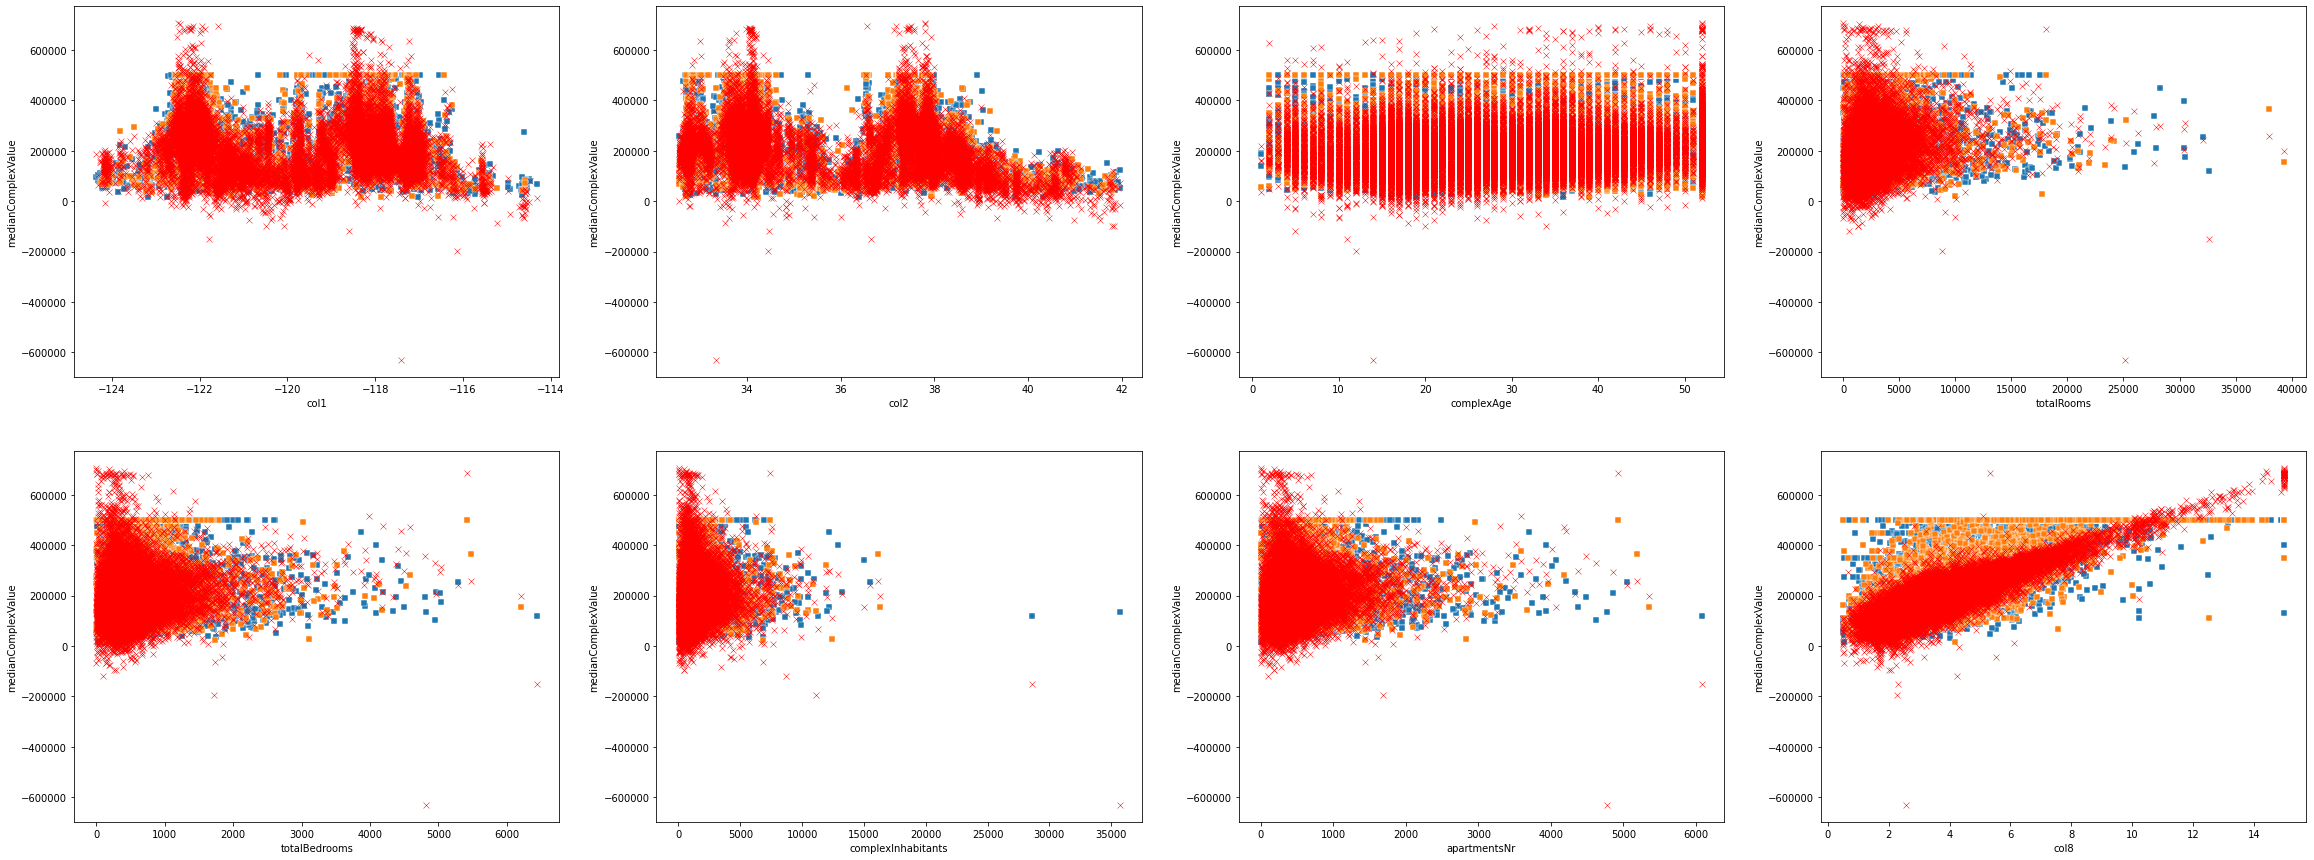

In [86]:

fig, axs = plt.subplots(ncols=4, nrows=2)
# set figure size
fig.set_figheight(15)
fig.set_figwidth(40)

i = 0
j = 0

for col in COLUMN_NAMES_FULL:
  if col!='medianCompexValue':
    a = sns.scatterplot(x=X_train[col], y=y_train, marker='s', ax=axs[i%2][j%4])
    a = sns.scatterplot(x=X_test[col], y=y_test, marker='s', ax=axs[i%2][j%4])
    a  = sns.scatterplot(x=X[col], y=Y_pred, color='red', marker='x', ax=axs[i%2][j%4])
    a.set(xlabel=col, ylabel='medianComplexValue')
    j+=1
    if j==4:
      i+=1

*Note: The red data is not plotted as a line - because it is multi-dimensional: there are 8 columns + 1predicted => there are 9 dimensions*

## Conclusions
- the best model achieved the r-squared score of 0.63, which means that 63% of the variability of the dependent variable is predicted from the independent variable, and the remaining 37% of the variability is still unaccounted for.

- multiple linear regression, when using all the parameters that are in the dataset, obtains better results than simple linear regression (even when using the column with the biggest correlation coefficient)

- because multiple linear regression uses more than 2-3 parameters, the final regression line cannot be plotted, because it is in multi dimensions (9 dimensions - 9 columns)

## Useful resources:

- https://seaborn.pydata.org/generated/seaborn.lineplot.html
- https://seaborn.pydata.org/
- https://seaborn.pydata.org/examples/many_pairwise_correlations.html
- https://seaborn.pydata.org/generated/seaborn.heatmap.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d
- https://scikit-learn.org/stable/modules/model_evaluation.html
